In [1]:
####################################################

####      Plotting domain averaged OLR for all simulations

####################################################

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm

In [3]:
case=[
'SAM6108_RCE_MC_20221230_256x256_DCa', # RED-THICK
'SAM6108_RCE_MC_20230226_256x256_DCa', # RED-THICK-LongHomo :: doradlwhomo = .true. in RCE_MC/prm
'SAM6108_RCE_MC_20230802_256x256' #SST=306
]

In [4]:
OLR_daily=[]

for i in range(len(case)):
    #print(case[i])
    path='/fs3/group/mullegrp/Bidyut_Goswami/sam_data/'+str(case[i])+'/OUT_'+str(case[i])+'/NETCDF_files/'
    f_in=''+str(path)+'RCE_MC_'+str(case[i])+'.nc'
#    print(f_in)
#   !ls -l $f_in
    fin = xr.open_dataset(f_in);
    LWd=fin['RADLWDN'];
    LWu=fin['RADLWUP'];
    PW=fin['PW'];
    OLR_z=LWu-LWd;
#    print(OLR_z);
    OLR=OLR_z.mean(dim='z');
    period=100
    OLRtmp=np.reshape(OLR.values,(int(OLR.shape[0]/period),period),order='F');
    OLR_d=np.mean(OLRtmp,0);
    OLR_daily.append(OLR_d);
    
OLR_daily=np.array(OLR_daily);

In [5]:
print(OLR_daily.shape)
daily_OLR=np.transpose(OLR_daily)

(3, 100)


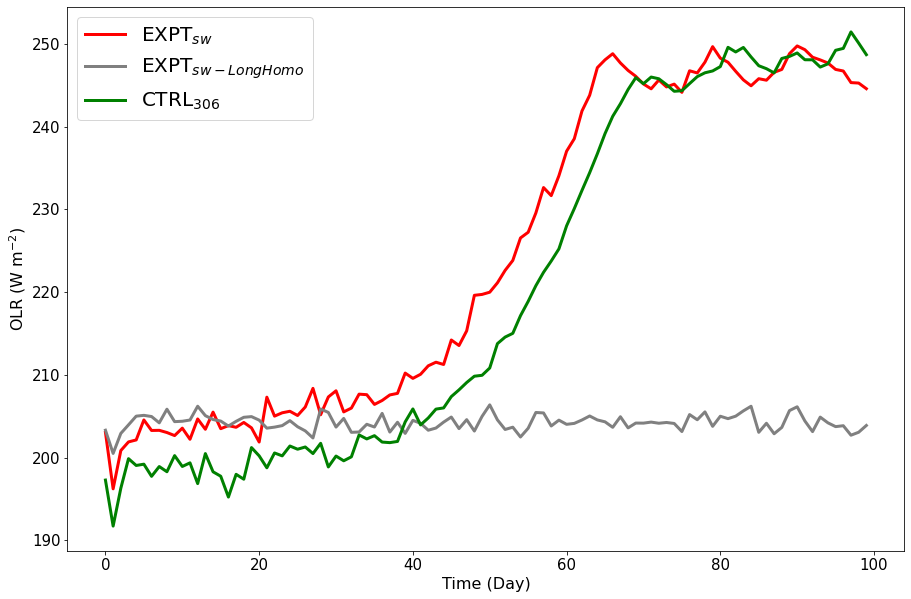

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
plt.plot(daily_OLR[:,0], color='red', linewidth=3, label='EXPT$_{sw}$')
plt.plot(daily_OLR[:,1], color='gray', linewidth=3, label='EXPT$_{sw-LongHomo}$')
plt.plot(daily_OLR[:,2], color='green', linewidth=3, label='CTRL$_{306}$')
plt.legend(fontsize=20)

# Increase title font size
#plt.title("Your Title", fontsize='x-large')

# Increase label and tick label font sizes
plt.ylabel("OLR (W m$^{-2}$)", fontsize=16)
plt.xlabel("Time (Day)", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_7"

# Uncomment to save as PNG
# plt.savefig(f'{fig_directory}/{figname}.png', format="png", transparent=True, dpi=1200)

plt.savefig(f'{fig_directory}/{figname}.svg', format="svg", transparent=True, dpi=1200)
plt.savefig(f'{fig_directory}/{figname}.pdf', format="pdf", transparent=True, dpi=1200)
plt.show()
